<h2>Predicting Heart Attack Risk</h2>
<h3>Notebook 2: Advanced EDA and Data Processing</h3>
<p><b>Author: Nikhar Bhavsar</b></p>

<hr>
<p>In this notebook, we will continue the Exploratory Data Analysis (EDA) process to better understand the relationship between the variables and the target variable, HadHeartAttack. Specifically, we will:</p>
<ul>
  <li><b>Compare Variables with Target:</b> Analyze the relationship between each feature and the target variable to identify significant patterns and correlations.</li>
  <li><b>Remove Outliers:</b> Detect and remove outliers in numerical data to enhance the accuracy of our predictive model.</li>
</ul>

## Table of Contents
1. [Importing Libraries](#importing-libraries)
3. [Loading Data](#loading-data)
4. [Advanced EDA](#advanced-eda)

## Importing Libraries

In [73]:
import sys
import os
sys.path.append(os.path.abspath('../utilities'))
import global_utils

In [74]:
# Data Manipulation and Analysis
import numpy as np  
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px

## Loading Data

In [76]:
df = global_utils.import_csv('./../data/processed/heart_attack_cleaned_v1.csv')
global_utils.define_df_settings()

Let's look at the columns which are present into our dataset.

In [78]:
df.head(10)

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HighRiskLastYear
0,Alabama,Female,Very good,Yes,9.0,No,No,No,No,No,No,Yes,No,Former smoker,No,White,65-69,1.60,71.67,27.99,No,No
1,Alabama,Male,Very good,Yes,6.0,No,No,No,No,No,No,Yes,Yes,Former smoker,No,White,70-74,1.78,95.25,30.13,No,No
2,Alabama,Male,Very good,No,8.0,No,No,No,No,No,No,Yes,No,Former smoker,Yes,White,75-79,1.85,108.86,31.66,Yes,No
3,Alabama,Female,Fair,Yes,9.0,No,No,No,No,Yes,No,Yes,No,Never smoked,No,White,80+,1.70,90.72,31.32,No,No
4,Alabama,Female,Good,Yes,5.0,No,No,No,No,No,No,Yes,No,Never smoked,No,White,80+,1.55,79.38,33.07,No,No
5,Alabama,Male,Good,Yes,7.0,No,No,No,No,No,No,No,No,Never smoked,Yes,White,50-54,1.85,120.20,34.96,Yes,No
6,Alabama,Female,Good,Yes,8.0,No,No,Yes,No,No,No,No,Yes,Never smoked,Yes,Black,80+,1.63,88.00,33.30,No,No
7,Alabama,Male,Fair,Yes,8.0,Yes,Yes,No,No,No,No,Yes,Yes,Never smoked,Yes,White,75-79,1.75,74.84,24.37,No,No
8,Alabama,Male,Good,No,6.0,No,No,No,No,No,No,Yes,No,Former smoker,Yes,White,40-44,1.70,78.02,26.94,No,No
9,Alabama,Female,Very good,Yes,7.0,No,No,No,No,No,No,Yes,No,Former smoker,Yes,White,75-79,1.68,63.50,22.60,No,No


In [79]:
# Now Let's conver Age-Group to Categorical, So we can have the correct order while plotting
age_order = [
    "18-24", "25-29", "30-34", "35-39", "40-44", "45-49",
    "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+"
]

df["AgeCategory"] = pd.Categorical(df["AgeCategory"], categories=age_order, ordered=True)

After modifying values in specific columns during our initial EDA, the initial dataset now appears more organized, with cleaner and more consistent categorizations, improving clarity.

## Advanced EDA

We have looked into the individual features. Now it's time to find-out the relationship between the HadHeartAttack and other features.

Let's look into the Had* features first to find their relationship between the HadHeartAttack variable.

/var/folders/xs/lmj1m_lx04z15s1p5yz456100000gn/T/ipykernel_4485/2656121991.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[yes_no_cols] = filtered_df[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)


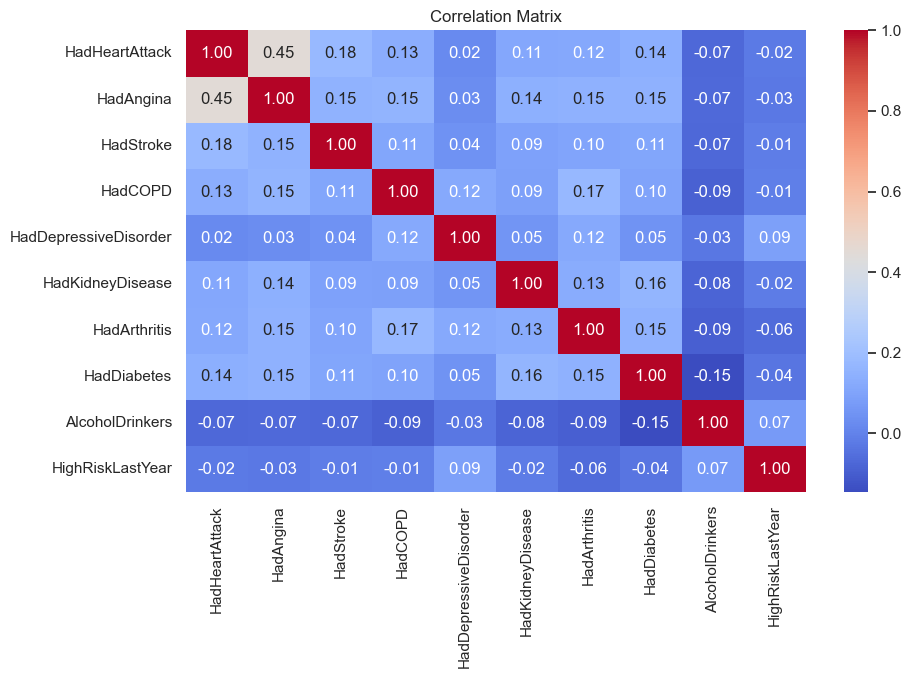

In [83]:
columns_list = [
    'HadHeartAttack', 'HadAngina', 
    'HadStroke', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 
    'HadArthritis', 'HadDiabetes', 'AlcoholDrinkers', 'HighRiskLastYear'
]

filtered_df = df[columns_list]

# Convert Yes/No columns to (Yes=1, No=0)
yes_no_cols = filtered_df.select_dtypes(include='object').columns
filtered_df[yes_no_cols] = filtered_df[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# Calculate the correlation matrix
correlation_matrix = filtered_df.corr()

# Show the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From the co-relation heatmap we can see that the 'HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'AlcoholDrinkers' has a notable co-relation with our target 'HadHeartAttack' column.

But on the other side 'HadDepressiveDisorder', 'HighRiskLastYear' doesn't seem like to have a stron co-relation with 'HadHeartAttack' column as well as other features. It will be a good idea to drop both of these columns.

In [85]:
# Drop both colums
df = df.drop(columns=['HadDepressiveDisorder','HighRiskLastYear'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246013 entries, 0 to 246012
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   State                  246013 non-null  object  
 1   Sex                    246013 non-null  object  
 2   GeneralHealth          246013 non-null  object  
 3   PhysicalActivities     246013 non-null  object  
 4   SleepHours             246013 non-null  float64 
 5   HadHeartAttack         246013 non-null  object  
 6   HadAngina              246013 non-null  object  
 7   HadStroke              246013 non-null  object  
 8   HadCOPD                246013 non-null  object  
 9   HadKidneyDisease       246013 non-null  object  
 10  HadArthritis           246013 non-null  object  
 11  HadDiabetes            246013 non-null  object  
 12  SmokerStatus           246013 non-null  object  
 13  ChestScan              246013 non-null  object  
 14  RaceEthnicityCategor

### Health Condition-wise Heart Attack Analysis
Let's plot the graph which can have the relationship between different health conditions and Heart Attack.

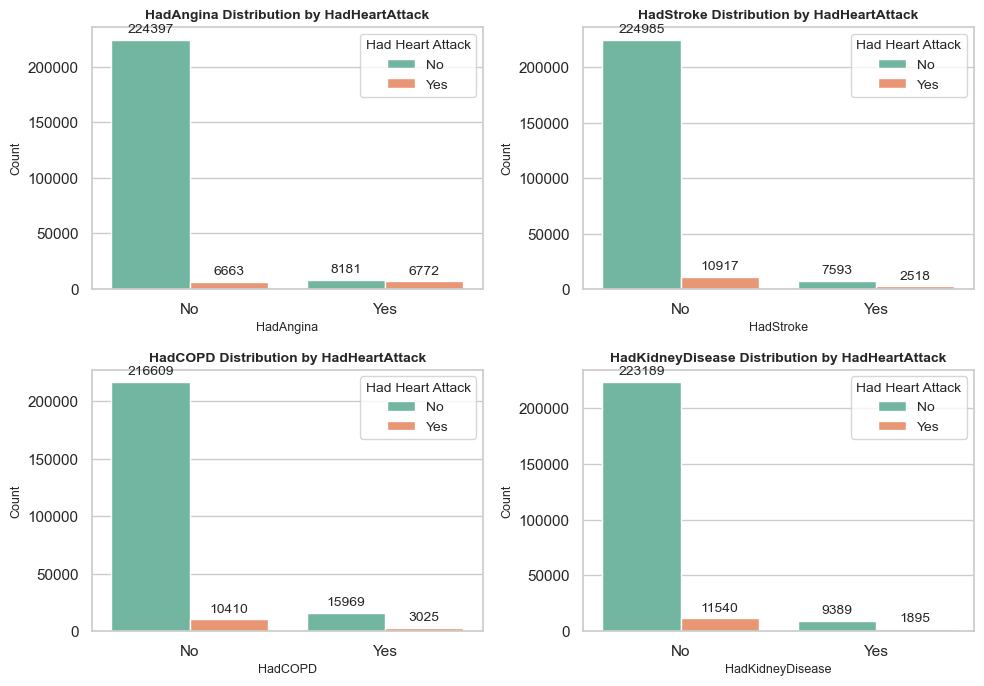

In [87]:
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
risk_factors = ['HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease']
palette = 'Set2' 

for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=df, x=risk_factor, hue='HadHeartAttack', palette=palette)
    plt.title(f"{risk_factor} Distribution by HadHeartAttack", fontsize=10, fontweight='bold')
    plt.xlabel(risk_factor, fontsize=9)
    plt.ylabel("Count", fontsize=9)
    
    # Add percentage labels
    for container in x.containers:
        x.bar_label(container, label_type='edge', fontsize=10, padding=3, fmt='%.0f')
    
    # Format legend
    plt.legend(title='Had Heart Attack', fontsize=10, title_fontsize='10')

plt.tight_layout()
plt.show()

From the charts we can say that 

Both angina and stroke increase the likelihood of a heart attack. Stroke patients appear to have a slightly higher proportion of heart attacks compared to those with angina.

Also, individuals with COPD or kidney disease seem to have a higher proportion of heart attacks compared to those without these conditions.
 


### Gender-wise Heart Attack Analysis
Let's plot the graph which shows the occurance of heart attacks among different genders using the vizulization.

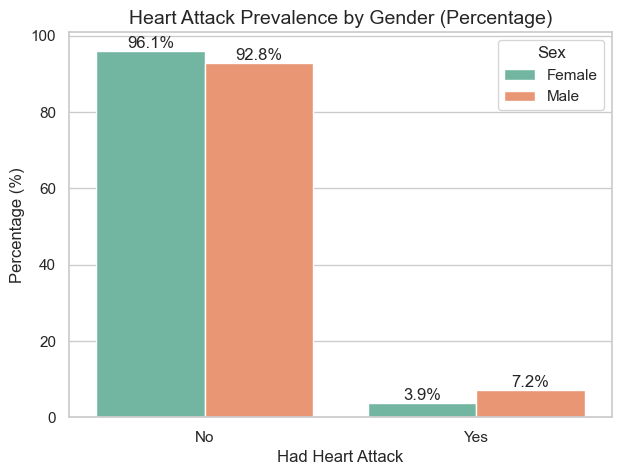

In [90]:
gender_heartattack = df.groupby(['Sex', 'HadHeartAttack']).size().reset_index(name='Count')
gender_total = df['Sex'].value_counts().reset_index()
gender_total.columns = ['Sex', 'Total']
gender_heartattack = pd.merge(gender_heartattack, gender_total, on='Sex')
gender_heartattack['Percentage'] = (gender_heartattack['Count'] / gender_heartattack['Total']) * 100

# Plotting
plt.figure(figsize=(7, 5))
sns.set(style='whitegrid')
x = sns.barplot(data=gender_heartattack, x='HadHeartAttack', y='Percentage', hue='Sex', palette='Set2')
plt.title("Heart Attack Prevalence by Gender (Percentage)", fontsize=14)
plt.xlabel("Had Heart Attack", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
for container in x.containers:
    x.bar_label(container, fmt='%.1f%%')

plt.show()

The chart shows that males are more likely to have had a heart attack (7.2%) compared to females (3.9%). This indicates that males are nearly 1.85 times more at risk than females. 
On the other side the majority of both genders did not have heart attacks, these numbers suggests potential differences in lifestyle, medical history, or behavioral factors.

Let's explore more regarding the Lifestyle difference between the Male and female to gain the more insights.

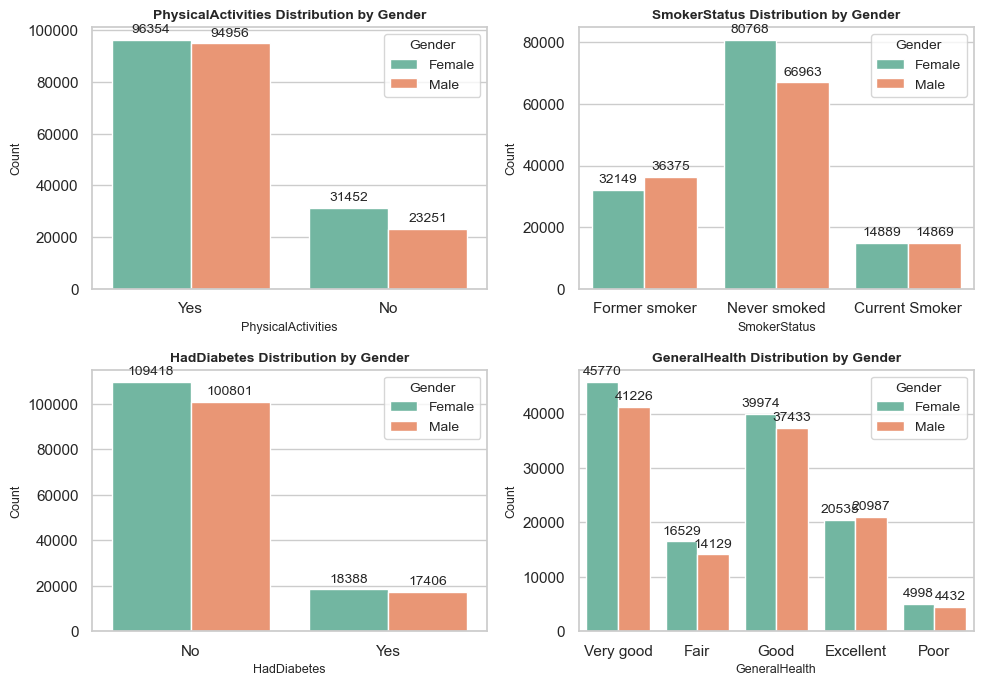

In [93]:
plt.figure(figsize=(10, 10))
sns.set(style='whitegrid')
risk_factors = ['PhysicalActivities', 'SmokerStatus', 'HadDiabetes', 'GeneralHealth']
palette = 'Set2' 

for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    x = sns.countplot(data=df, x=risk_factor, hue='Sex', palette=palette)
    plt.title(f"{risk_factor} Distribution by Gender", fontsize=10, fontweight='bold')
    plt.xlabel(risk_factor, fontsize=9)
    plt.ylabel("Count", fontsize=9)
    
    # Add percentage labels
    for container in x.containers:
        x.bar_label(container, label_type='edge', fontsize=10, padding=3, fmt='%.0f')
    
    # Format legend
    plt.legend(title='Gender', fontsize=10, title_fontsize='10')

plt.tight_layout()
plt.show()

The "Physical Activities" chart shows that women are more active than men, which helps protect against heart disease.

The "Smoker Status" chart also shows that fewer women smoke compared to men, which lowers their chances of having heart problems.

The "Had Diabetes" chart shows that fewer women have diabetes, which is another factor that can lead to heart disease, but the difference is small.

At last, the "General Health" chart shows that more women than men think their health is "Very Good" or "Excellent," which suggests they are living healthier lives, reducing their risk of heart attacks.

### Exploring Relationships with Numerical Features

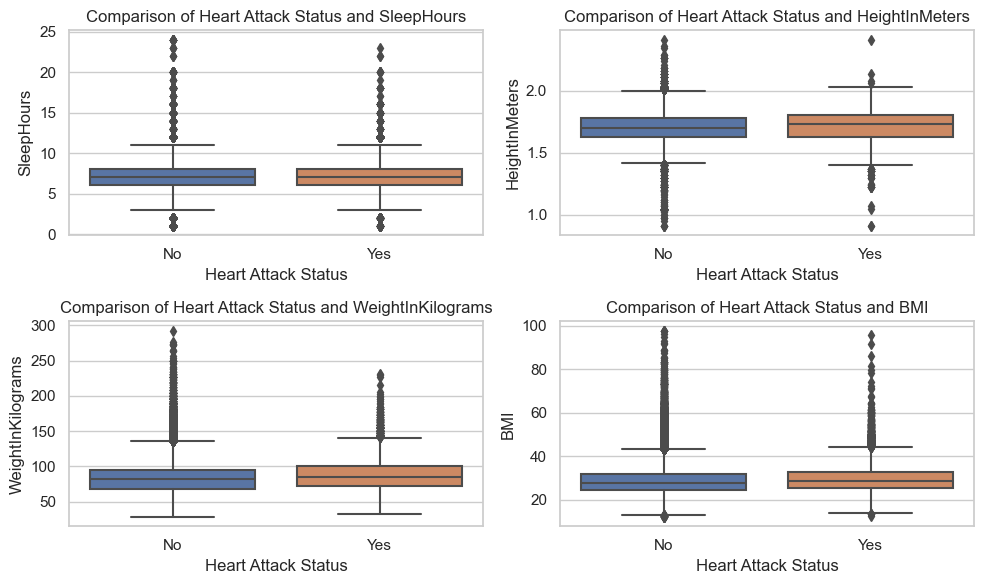

In [96]:
numerical_features = ['SleepHours','HeightInMeters','WeightInKilograms','BMI']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='HadHeartAttack', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Comparison of Heart Attack Status and {feature}')
    axes[i].set_xlabel('Heart Attack Status')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

From the Box plots we can say that for "WeightInKilograms" and "BMI" - People who had heart attacks generally weighed more and had higher BMI. Their weight/BMI ranges were also wider, meaning these factors might play a role in heart attack risk.

On other side for "SleepHourts" and "Height" doesn't have the significant effect for the heart attack risk.

Now as we can see we have many outliers for SleepHours, Height and Weight. It will be the good idea to remove some data with the outlier.

In [99]:
# Find the Number of records within the Outlier range
outlier_sleep_has_heart_attack = df[((df['SleepHours'] < 3) | (df['SleepHours'] > 15)) & (df['HadHeartAttack'] == 'Yes')]
outlier_sleep_has_not_heart_attack = df[((df['SleepHours'] < 3) | (df['SleepHours'] > 15)) & (df['HadHeartAttack'] == 'No')]

# Get the count of people who meet the condition
print("Number of people who had a heart attack with abnormal sleep hours:", len(outlier_sleep_has_heart_attack))
print("Number of people who doesn't had a heart attack with abnormal sleep hours:", len(outlier_sleep_has_not_heart_attack))

Number of people who had a heart attack with abnormal sleep hours: 181
Number of people who doesn't had a heart attack with abnormal sleep hours: 1450


<b>Most people sleep between 3 and 15 hours. Since there’s a lot of data in this range, replace these values with the average sleep time  will be the good idea instead of deleting them. </b>

In [101]:
# Calculate the mean of SleepHours excluding the outliers
mean_sleep = df[(df['SleepHours'] >= 3) & (df['SleepHours'] <= 15)]['SleepHours'].mean()

# Replace outliers with the calculated mean
df.loc[(df['SleepHours'] < 3) | (df['SleepHours'] > 15), 'SleepHours'] = mean_sleep

<b>Let's reconfirm</b>

In [103]:
# Find the Number of records within the Outlier range
outlier_sleep_has_heart_attack = df[((df['SleepHours'] < 3) | (df['SleepHours'] > 15)) & (df['HadHeartAttack'] == 'Yes')]

# Get the count of people who meet the condition
print("Number of people who had a heart attack with abnormal sleep hours:", len(outlier_sleep_has_heart_attack))

Number of people who had a heart attack with abnormal sleep hours: 0


In [104]:
# Find the Number of records within the Outlier range
outlier_height_has_heart_attack = df[((df['HeightInMeters'] < 1.2) | (df['HeightInMeters'] > 2.1)) & (df['HadHeartAttack'] == 'Yes')]
outlier_height_has_no_heart_attack = df[((df['HeightInMeters'] < 1.2) | (df['HeightInMeters'] > 2.1)) & (df['HadHeartAttack'] == 'No')]

# Get the count of people who meet the condition
print("Number of people who had a heart attack with abnormal height:", len(outlier_height_has_heart_attack))
print("Number of people who doesn't had a heart attack with abnormal height:", len(outlier_height_has_no_heart_attack))

Number of people who had a heart attack with abnormal height: 6
Number of people who doesn't had a heart attack with abnormal height: 109


In [105]:
# Find the Number of records within the Outlier range
outlier_weight_has_heart_attack = df[((df['WeightInKilograms'] < 30) | (df['WeightInKilograms'] > 200)) & (df['HadHeartAttack'] == 'Yes')]
outlier_weight_has_not_heart_attack = df[((df['WeightInKilograms'] < 30) | (df['WeightInKilograms'] > 200)) & (df['HadHeartAttack'] == 'No')]

# Get the count of people who meet the condition
print("Number of people who had a heart attack with abnormal weight:", len(outlier_weight_has_heart_attack))
print("Number of people who doesn't had a heart attack with abnormal weight:", len(outlier_weight_has_not_heart_attack))

Number of people who had a heart attack with abnormal weight: 6
Number of people who doesn't had a heart attack with abnormal weight: 145


As we can see there is not a much amount of data lie between the unrealistic values of the Height and Weight. So it will be the good idea to remove them.

In [107]:
# Remove outliers for HeightInMeters and WeightInKilograms
df = df[(df['HeightInMeters'] >= 1.2) & (df['HeightInMeters'] <= 2.1)]
df = df[(df['WeightInKilograms'] >= 30) & (df['WeightInKilograms'] <= 200)]

print("Data after removing outliers for Height and Weight:", df.shape)

Data after removing outliers for Height and Weight: (245749, 20)


### Age-wise Heart Attack Analysis
Let's plot the graph which shows the occurance of heart attacks among different age categories.
We will investigate how physical activity, smoking, and diabetes relate to heart attack risk across various age categories.

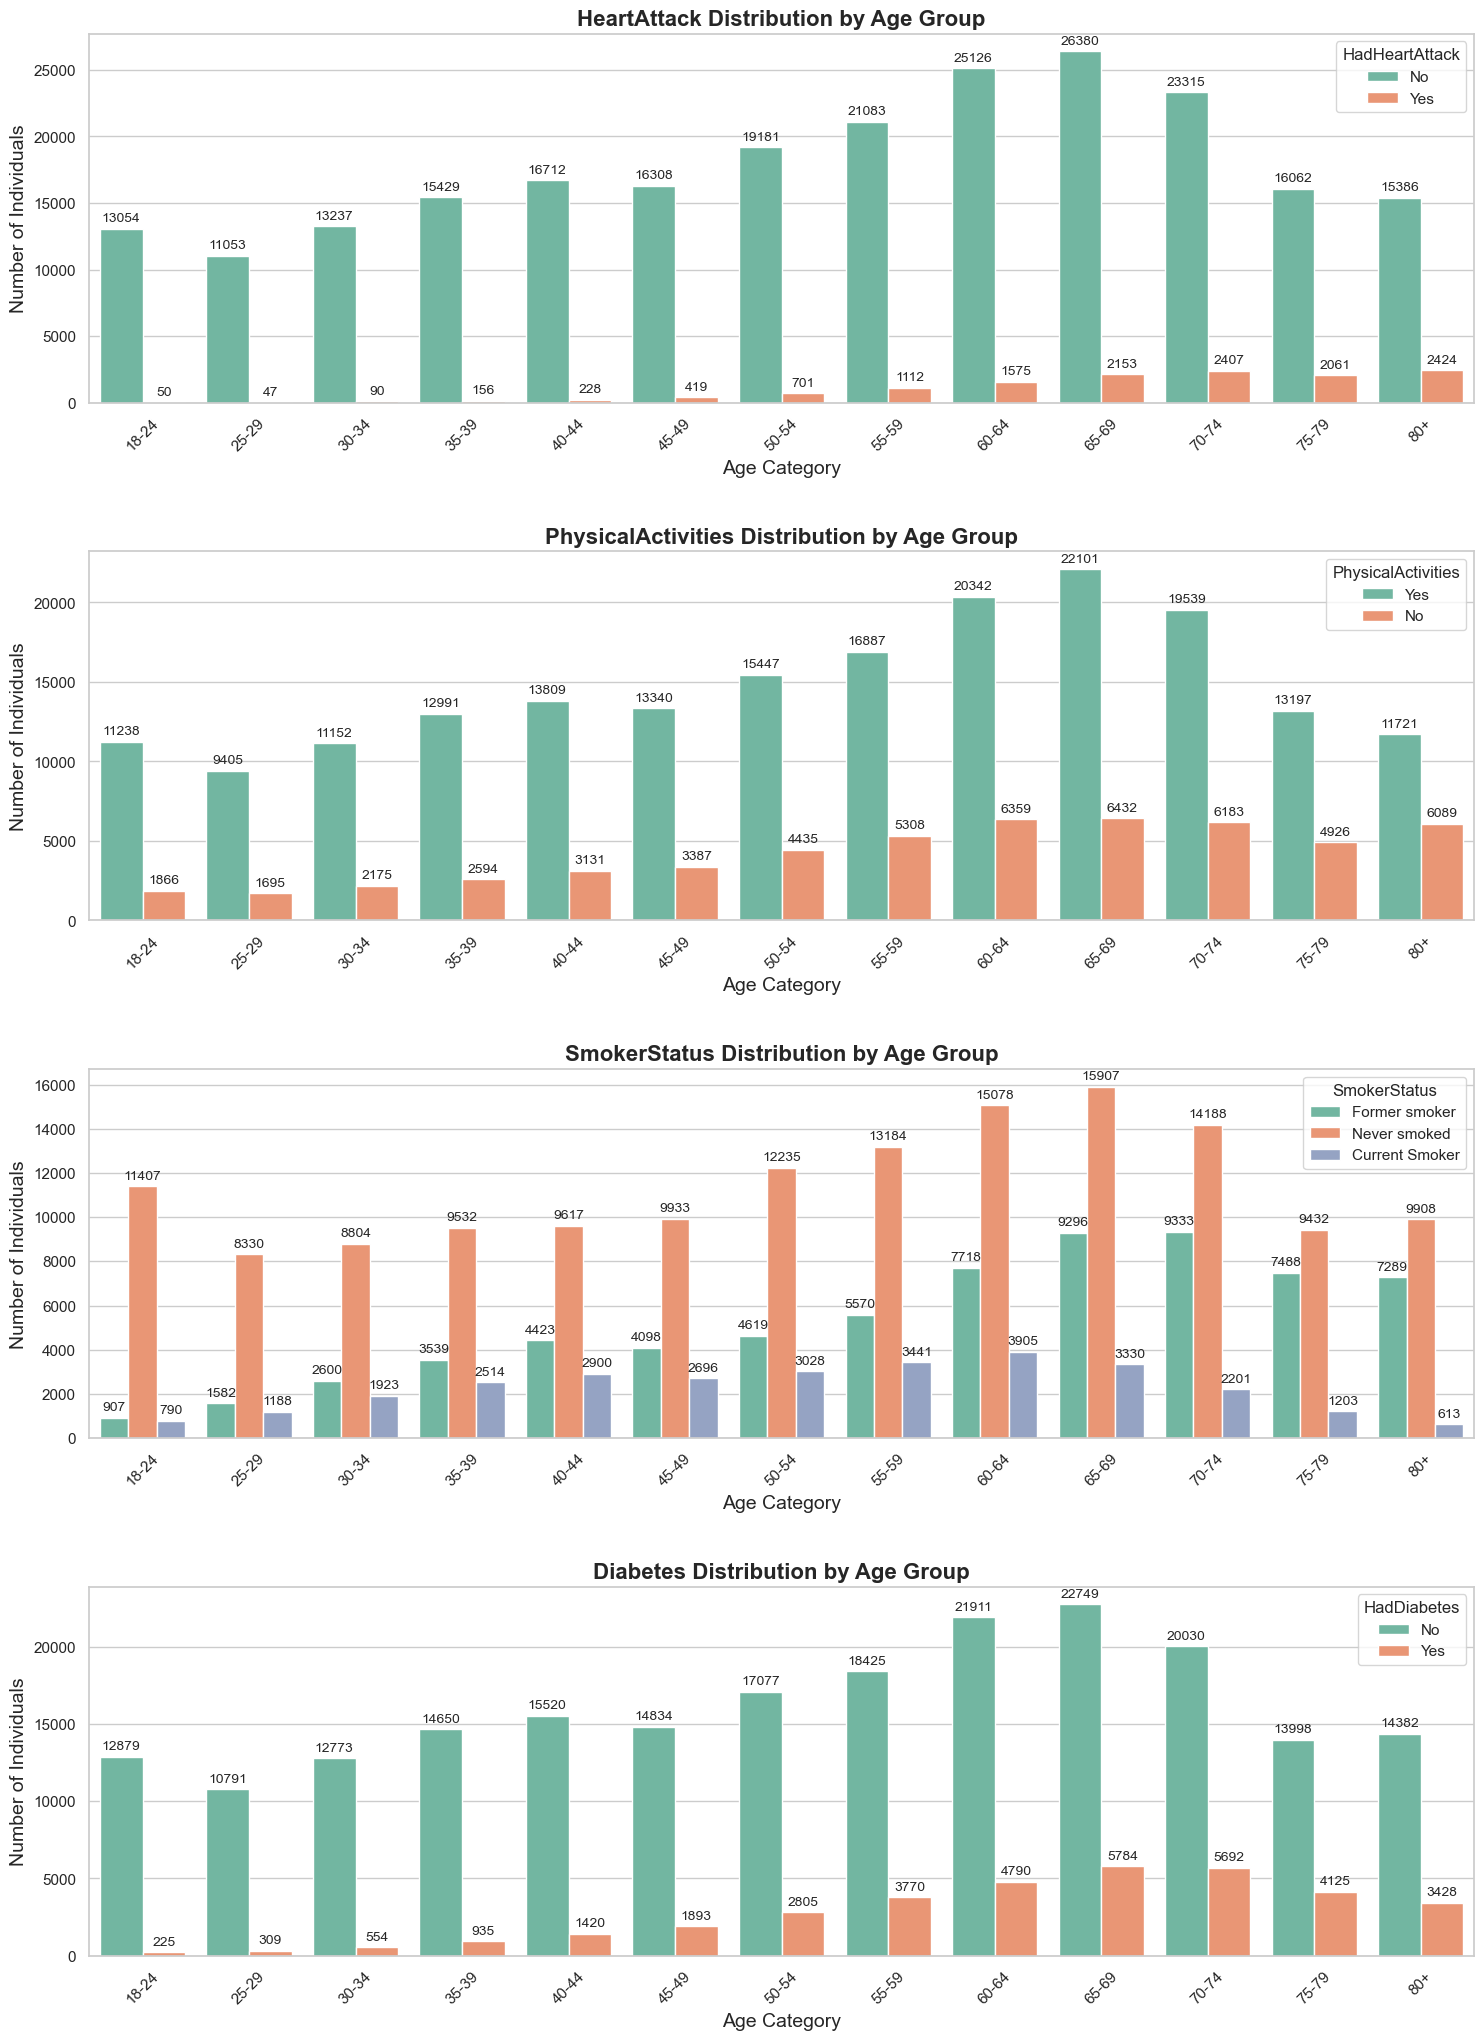

In [109]:
plt.figure(figsize=(15, 25))
sns.set(style='whitegrid')
palette = 'Set2'  # Using a color palette for consistency

risk_factors = ['HadHeartAttack', 'PhysicalActivities', 'SmokerStatus', 'HadDiabetes']
for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(5, 1, i)
    ax = sns.countplot(data=df, x='AgeCategory', hue=risk_factor, palette=palette)
    plt.title(f"{risk_factor.replace('Had', '')} Distribution by Age Group", fontsize=16, fontweight='bold')
    plt.xlabel("Age Category", fontsize=14)
    plt.ylabel("Number of Individuals", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title=risk_factor, loc='upper right')
    
    # Adding data labels on each bar
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=10)

plt.tight_layout(h_pad=3)
plt.show()

As seen in the first chart, the risk of heart attacks increases significantly after the age of 45, with the numbers rising as age progresses. A similar trend is observed with diabetes, which is a key risk factor for heart attacks.

Additionally, after the age of 45, a growing number of individuals become physically inactive, further contributing to the risk.

In [111]:
df.to_csv('./../data/processed/heart_attack_cleaned_v2.csv', index=False)